# Exploratory Data Analysis with Python

---



# **Importing libraries and loading dataset**


*   We will work with pandas, numpy, seaborn and matplotlib here for data analysis and vizualitzations.
*   Include file path in read_csv
*   df.head() will print first 5 rows of dataset





In [1]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sns

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('/content/India.csv')
df.head()

,Year,"Charges for the use of intellectual property, payments (BoP, current US$)","Charges for the use of intellectual property, receipts (BoP, current US$)",Research and development expenditure (% of GDP),Scientific and technical journal articles,"Patent applications, nonresidents","Patent applications, residents","Trademark applications, direct nonresident",Researchers in R&D (per million people),Technicians in R&D (per million people),"Trademark applications, direct resident",High-technology exports (current US$),High-technology exports (% of manufactured exports)
0,1960,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,0.0
1,1961,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,0.0
2,1962,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,0.0
3,1963,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,0.0
4,1964,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,0.0


In [2]:
df.shape #41 rows and 9 cols

(60, 13)

In [3]:
df.columns.values 

array(['Year',
       'Charges for the use of intellectual property, payments (BoP, current US$)',
       'Charges for the use of intellectual property, receipts (BoP, current US$)',
       'Research and development expenditure (% of GDP)',
       'Scientific and technical journal articles',
       'Patent applications, nonresidents',
       'Patent applications, residents',
       'Trademark applications, direct nonresident',
       'Researchers in R&D (per million people)',
       'Technicians in R&D (per million people)',
       'Trademark applications, direct resident',
       'High-technology exports (current US$)',
       'High-technology exports (% of manufactured exports)'],
      dtype=object)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Year                                                                       60 non-null     int64  
 1   Charges for the use of intellectual property, payments (BoP, current US$)  60 non-null     float64
 2   Charges for the use of intellectual property, receipts (BoP, current US$)  60 non-null     float64
 3   Research and development expenditure (% of GDP)                            60 non-null     float64
 4   Scientific and technical journal articles                                  60 non-null     float64
 5   Patent applications, nonresidents                                          60 non-null     int64  
 6   Patent applications, residents                              

# **Statistical values**



*   describe() method will give us statistical values of all the columns individually.
*   We can get to know mean, standard deviation, quartiles, min, max, etc



In [5]:
df.describe()

,Year,"Charges for the use of intellectual property, payments (BoP, current US$)","Charges for the use of intellectual property, receipts (BoP, current US$)",Research and development expenditure (% of GDP),Scientific and technical journal articles,"Patent applications, nonresidents","Patent applications, residents","Trademark applications, direct nonresident",Researchers in R&D (per million people),Technicians in R&D (per million people),"Trademark applications, direct resident",High-technology exports (current US$),High-technology exports (% of manufactured exports)
count,60.000000,6.000000e+01,6.000000e+01,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,6.000000e+01,60.000000
mean,1989.500000,1.011673e+09,1.036969e+08,0.282496,20281.940167,8838.950000,2959.833333,6086.083333,18.947559,10.935826,53615.783333,2.521008e+09,1.371129
std,17.464249,2.012070e+09,2.118103e+08,0.363189,36188.168520,12321.131895,4265.879007,8474.150890,55.237114,30.586679,79280.522303,5.803933e+09,3.107755
min,1960.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,1974.750000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
50%,1989.500000,7.053194e+07,7.517477e+05,0.000000,0.000000,2500.500000,1137.500000,1991.000000,0.000000,0.000000,14441.500000,0.000000e+00,0.000000
75%,2004.250000,6.265683e+08,6.632212e+07,0.704448,27808.845000,10254.000000,3572.250000,10567.750000,0.000000,0.000000,77537.250000,0.000000e+00,0.000000
max,2019.000000,7.905958e+09,8.716052e+08,0.858760,135787.790000,34402.000000,16289.000000,31659.000000,252.703920,110.770410,297750.000000,2.027309e+10,9.618386


# **Pair plot graph**



*   sns.pairplot is used to view all the graphs with all the columns.
*   We can get rough idea about how one column is related with the other.



/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


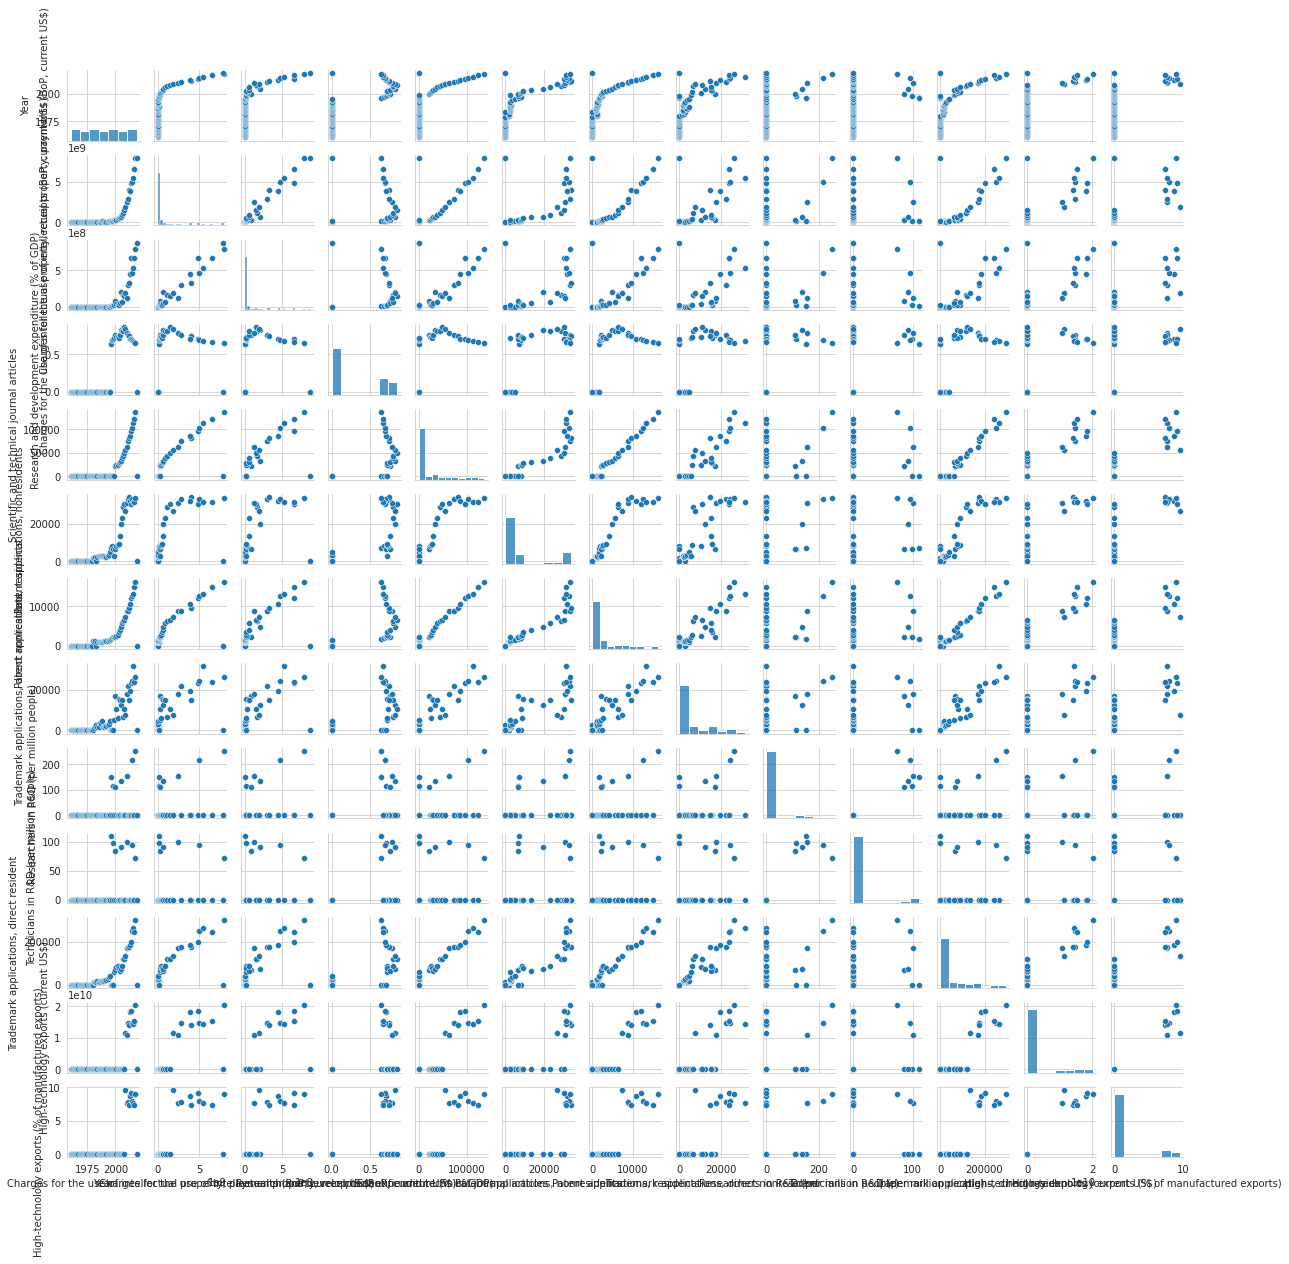

In [6]:
sns.set_style('whitegrid')
g = sns.pairplot(df)
g.fig.set_size_inches(20,20)

# **Co-relation Matrix**



*   Co-relation matrix is generally used for Linear Regression because it gives symmetric matrix.
*   It won't show us if any columns have non-linear relationship which is drawback of Co-relation matrix



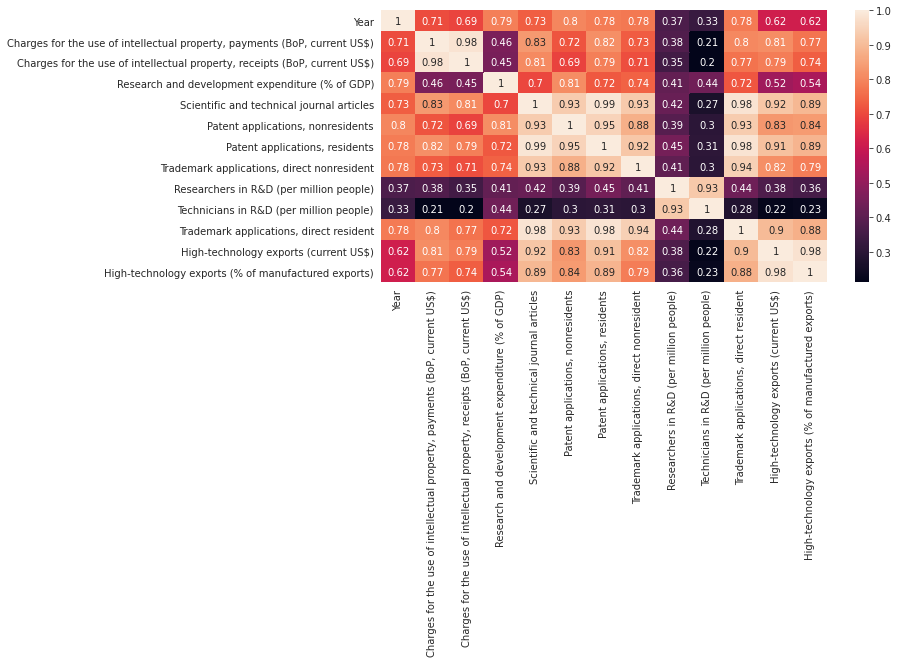

In [7]:
dataset = df.corr()
dataset = pd.DataFrame(dataset)
dataset

plt.figure(figsize=(10,5))
sns.set_style("white")
sns.heatmap(dataset, robust=True, annot=True)

# **PPS Matrix**
*(Predictive Power Score)*



*   To overcome the drawback of co-relation matrix, we will use PPS matrix.
*   This matrix will also let us know about the non-linear relationships among variables.



In [8]:
pip install ppscore

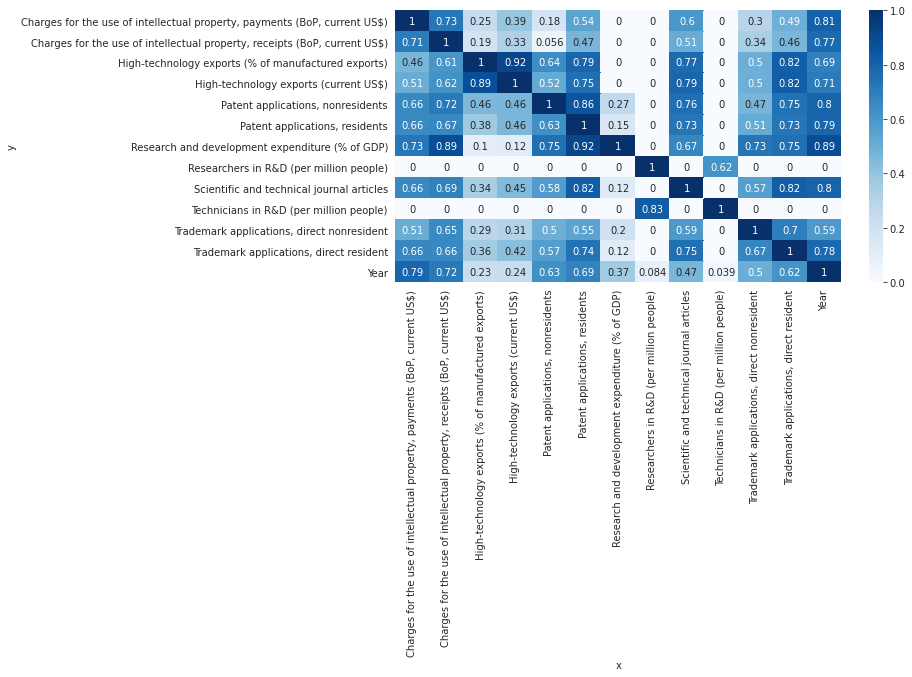

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import ppscore as pps
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
matrix_df = pps.matrix(df).pivot(columns='x', index='y',  values='ppscore')
sns.heatmap(matrix_df, annot=True, cmap='Blues')

In [11]:
pps.predictors(df, "Researchers in R&D (per million people)")
# x is feature, y is target

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Technicians in R&D (per million people),Researchers in R&D (per million people),0.616436,regression,True,mean absolute error,18.947559,7.267603,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
1,Year,Researchers in R&D (per million people),0.000000,regression,True,mean absolute error,18.947559,32.430836,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
2,"Charges for the use of intellectual property, ...",Researchers in R&D (per million people),0.000000,regression,True,mean absolute error,18.947559,29.863003,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
3,"Charges for the use of intellectual property, ...",Researchers in R&D (per million people),0.000000,regression,True,mean absolute error,18.947559,28.068952,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
4,Research and development expenditure (% of GDP),Researchers in R&D (per million people),0.000000,regression,True,mean absolute error,18.947559,39.466960,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
5,Scientific and technical journal articles,Researchers in R&D (per million people),0.000000,regression,True,mean absolute error,18.947559,32.692378,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
6,"Patent applications, nonresidents",Researchers in R&D (per million people),0.000000,regression,True,mean absolute error,18.947559,26.836597,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
7,"Patent applications, residents",Researchers in R&D (per million people),0.000000,regression,True,mean absolute error,18.947559,31.469459,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
8,"Trademark applications, direct nonresident",Researchers in R&D (per million people),0.000000,regression,True,mean absolute error,18.947559,27.578856,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
9,"Trademark applications, direct resident",Researchers in R&D (per million people),0.000000,regression,True,mean absolute error,18.947559,31.777962,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."


# **Subplots with Seaborn**



*   subplots(6, 2) shows 6 rows with 2 columns.



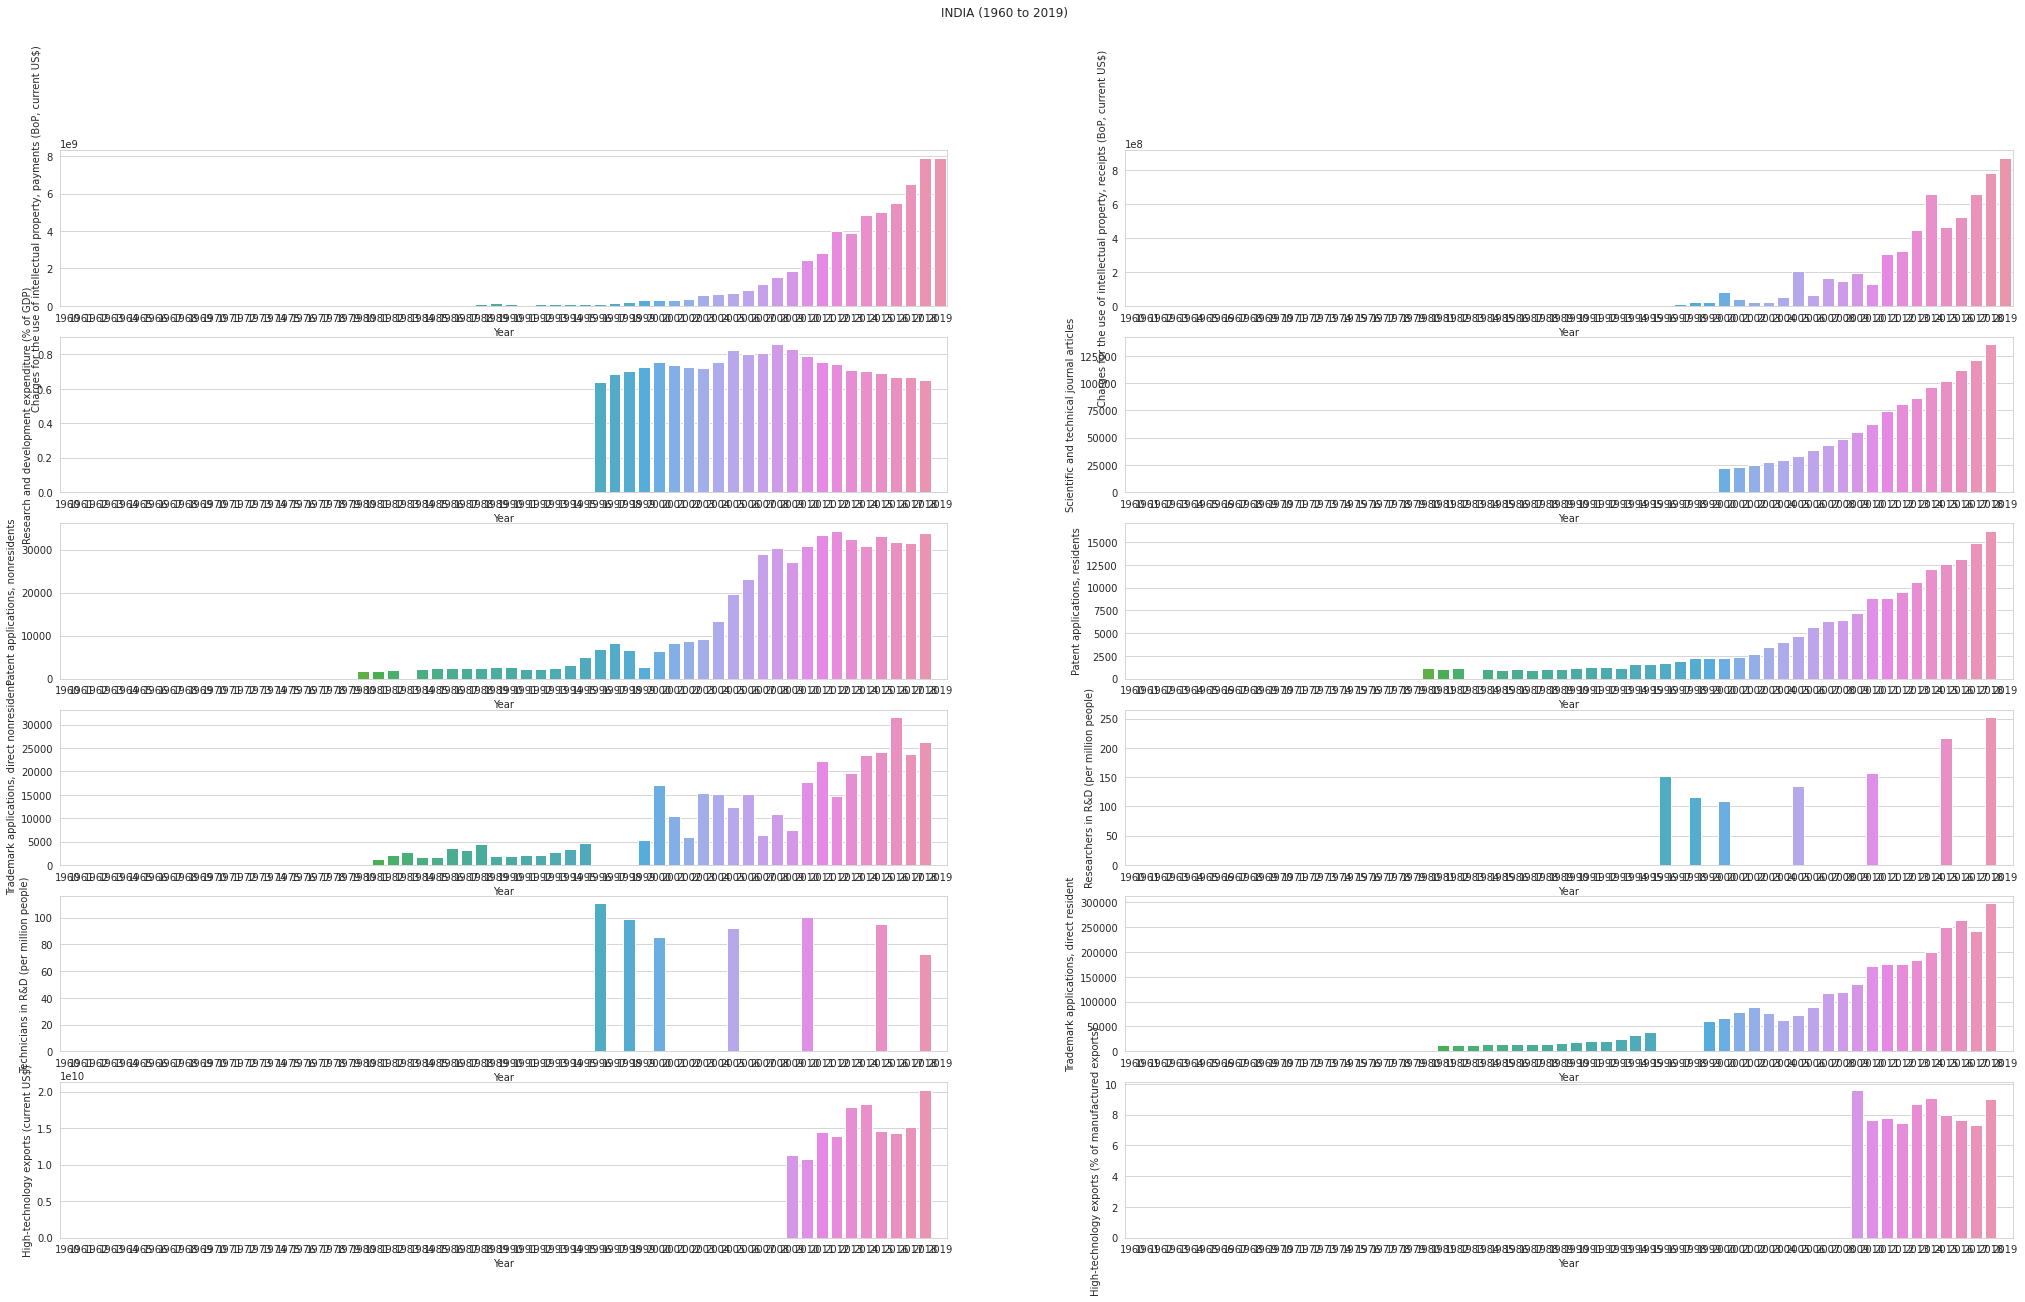

In [13]:
sns.set_style('whitegrid')
groupedvalues=df.iloc[:,:].groupby('Year').sum().reset_index()

fig, axes = plt.subplots(6, 2, figsize=(35,20))
fig.suptitle('INDIA (1960 to 2019)')

sns.barplot(ax=axes[0][0], x='Year',y='Charges for the use of intellectual property, payments (BoP, current US$)',data=groupedvalues)
sns.barplot(ax=axes[0][1], x ='Year', y ='Charges for the use of intellectual property, receipts (BoP, current US$)',  data=groupedvalues)

sns.barplot(ax=axes[1][0], x='Year',y='Research and development expenditure (% of GDP)',data=groupedvalues)
sns.barplot(ax=axes[1][1], x='Year',y='Scientific and technical journal articles',data=groupedvalues)

sns.barplot(ax=axes[2][0], x='Year',y='Patent applications, nonresidents',data=groupedvalues)
sns.barplot(ax=axes[2][1], x ='Year', y ='Patent applications, residents',  data=groupedvalues)

sns.barplot(ax=axes[3][0], x='Year',y='Trademark applications, direct nonresident',data=groupedvalues)
sns.barplot(ax=axes[3][1], x='Year',y='Researchers in R&D (per million people)',data=groupedvalues)

sns.barplot(ax=axes[4][0], x='Year',y='Technicians in R&D (per million people)',data=groupedvalues)
sns.barplot(ax=axes[4][1], x ='Year', y ='Trademark applications, direct resident',  data=groupedvalues)

sns.barplot(ax=axes[5][0], x='Year',y='High-technology exports (current US$)',data=groupedvalues)
sns.barplot(ax=axes[5][1], x='Year',y='High-technology exports (% of manufactured exports)',data=groupedvalues)

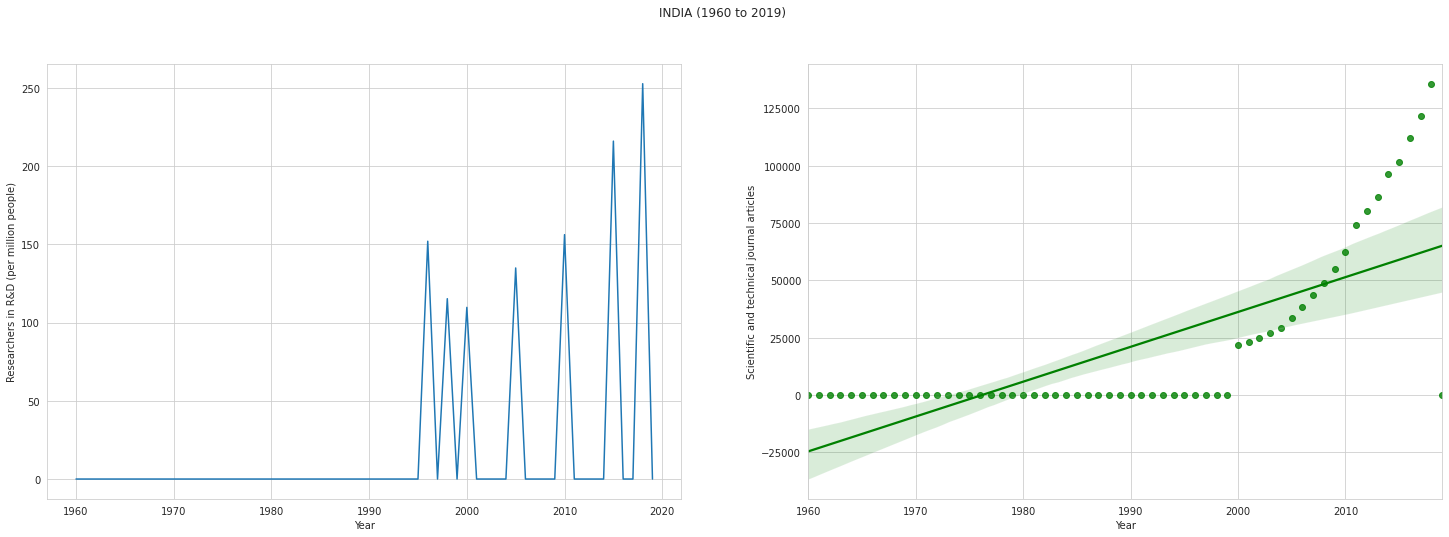

In [14]:
sns.set_style('whitegrid')
groupedvalues=df.iloc[:,:].groupby('Year').sum().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(25,8))
fig.suptitle('INDIA (1960 to 2019)')
sns.lineplot(ax=axes[0], x='Year',y='Researchers in R&D (per million people)', data=groupedvalues)
sns.regplot(ax=axes[1], x ='Year', y ='Scientific and technical journal articles', data=groupedvalues, color="g") 

# **Lineplot of all columns in one graph**



*   We have limited our graph with few plots only.
*   However, you can include all the columns as well.
(You can remove comments to check them)



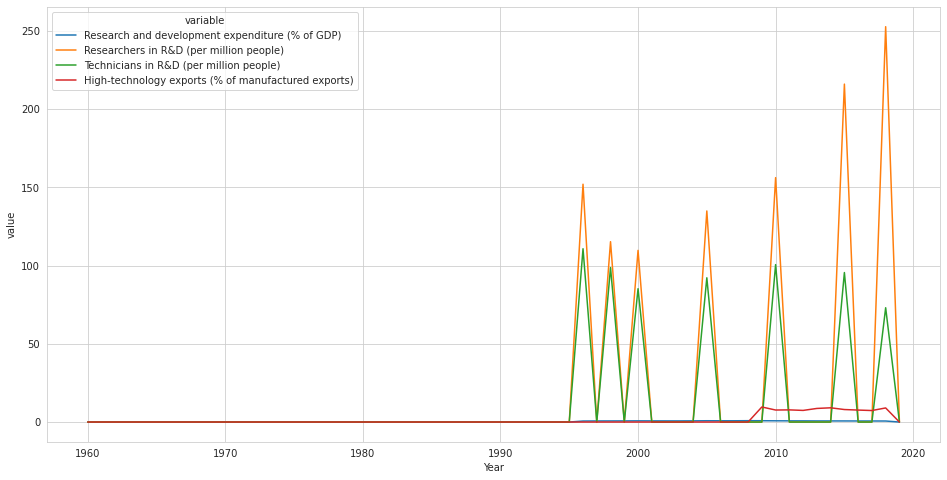

In [15]:
plt.figure(figsize=(16,8))
num_rows = len(df)
years = df['Year']
data_preproc = pd.DataFrame({
    'Year': years, 
    # 'Charges for the use of intellectual property, payments (BoP, current US$)': df['Charges for the use of intellectual property, payments (BoP, current US$)'],
    # 'Charges for the use of intellectual property, receipts (BoP, current US$)': df['Charges for the use of intellectual property, receipts (BoP, current US$)'],
    'Research and development expenditure (% of GDP)': df['Research and development expenditure (% of GDP)'],
    # 'Scientific and technical journal articles': df['Scientific and technical journal articles'],
    # 'Patent applications, nonresidents': df['Patent applications, nonresidents'],
    # 'Patent applications, residents': df['Patent applications, residents'],
    # 'Trademark applications, direct nonresident': df['Trademark applications, direct nonresident'],
    'Researchers in R&D (per million people)': df['Researchers in R&D (per million people)'],
    'Technicians in R&D (per million people)': df['Technicians in R&D (per million people)'],
    # 'Trademark applications, direct resident': df['Trademark applications, direct resident'],
    # 'High-technology exports (current US$)': df['High-technology exports (current US$)'],
    'High-technology exports (% of manufactured exports)': df['High-technology exports (% of manufactured exports)']
    })

sns.lineplot(x='Year', y='value', hue='variable', 
             data=pd.melt(data_preproc, ['Year']))

# **Scatter Plot**

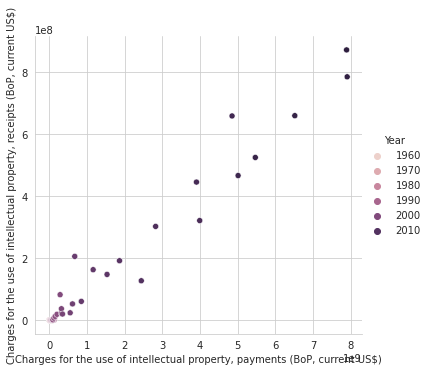

In [16]:
sns.relplot(x ='Charges for the use of intellectual property, payments (BoP, current US$)',
            y='Charges for the use of intellectual property, receipts (BoP, current US$)', hue='Year', data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


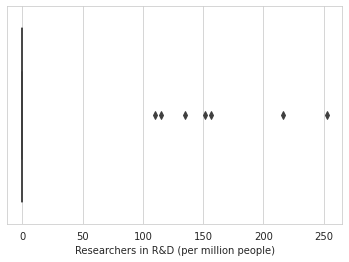

In [17]:
sns.boxplot(df['Researchers in R&D (per million people)'])

# **New Data with 6 Countries**

In [19]:
data = pd.read_csv('/content/10countires.csv')
data.head(60)

,Country,Year,"Charges for the use of intellectual property, payments (BoP, current US$)","Charges for the use of intellectual property, receipts (BoP, current US$)",Research and development expenditure (% of GDP),Scientific and technical journal articles,"Patent applications, nonresidents","Patent applications, residents","Trademark applications, direct nonresident",Researchers in R&D (per million people),Technicians in R&D (per million people),"Trademark applications, direct resident",High-technology exports (current US$),High-technology exports (% of manufactured exports),"Population, total (millions)",Human Development Index (HDI),"Literacy rate, adult (% ages 15 and older)",Gross national income (GNI) per capita (2011 PPP$),Life expectancy at birth,Government expenditure on education (% of GDP),Population with at least some secondary education (% ages 25 and older)
0,India,1960,0.000000e+00,0.000000e+00,0.00000,0.00,0,0,0,0.00000,0.00000,0,0.000000e+00,0.000000,0.0,0.000,0.0,0,0.0,0.0,0.0
1,India,1961,0.000000e+00,0.000000e+00,0.00000,0.00,0,0,0,0.00000,0.00000,0,0.000000e+00,0.000000,0.0,0.000,0.0,0,0.0,0.0,0.0
2,India,1962,0.000000e+00,0.000000e+00,0.00000,0.00,0,0,0,0.00000,0.00000,0,0.000000e+00,0.000000,0.0,0.000,0.0,0,0.0,0.0,0.0
3,India,1963,0.000000e+00,0.000000e+00,0.00000,0.00,0,0,0,0.00000,0.00000,0,0.000000e+00,0.000000,0.0,0.000,0.0,0,0.0,0.0,0.0
4,India,1964,0.000000e+00,0.000000e+00,0.00000,0.00,0,0,0,0.00000,0.00000,0,0.000000e+00,0.000000,0.0,0.000,0.0,0,0.0,0.0,0.0
5,India,1965,0.000000e+00,0.000000e+00,0.00000,0.00,0,0,0,0.00000,0.00000,0,0.000000e+00,0.000000,0.0,0.000,0.0,0,0.0,0.0,0.0
6,India,1966,0.000000e+00,0.000000e+00,0.00000,0.00,0,0,0,0.00000,0.00000,0,0.000000e+00,0.000000,0.0,0.000,0.0,0,0.0,0.0,0.0
7,India,1967,0.000000e+00,0.000000e+00,0.00000,0.00,0,0,0,0.00000,0.00000,0,0.000000e+00,0.000000,0.0,0.000,0.0,0,0.0,0.0,0.0
8,India,1968,0.000000e+00,0.000000e+00,0.00000,0.00,0,0,0,0.00000,0.00000,0,0.000000e+00,0.000000,0.0,0.000,0.0,0,0.0,0.0,0.0
9,India,1969,0.000000e+00,0.000000e+00,0.00000,0.00,0,0,0,0.00000,0.00000,0,0.000000e+00,0.000000,0.0,0.000,0.0,0,0.0,0.0,0.0


In [20]:
data.tail()

,Country,Year,"Charges for the use of intellectual property, payments (BoP, current US$)","Charges for the use of intellectual property, receipts (BoP, current US$)",Research and development expenditure (% of GDP),Scientific and technical journal articles,"Patent applications, nonresidents","Patent applications, residents","Trademark applications, direct nonresident",Researchers in R&D (per million people),Technicians in R&D (per million people),"Trademark applications, direct resident",High-technology exports (current US$),High-technology exports (% of manufactured exports),"Population, total (millions)",Human Development Index (HDI),"Literacy rate, adult (% ages 15 and older)",Gross national income (GNI) per capita (2011 PPP$),Life expectancy at birth,Government expenditure on education (% of GDP),Population with at least some secondary education (% ages 25 and older)
895,Zimbabwe,2015,19545573.97,2267903.281,0.0,268.98,19,9,1690,0.0,0.0,285,11830010.0,3.282469,13.8,0.544,0.0,2226,59.5,0.0,57.7
896,Zimbabwe,2016,10372933.18,2372226.832,0.0,313.80,5,8,1866,0.0,0.0,155,13735165.0,5.168142,14.0,0.549,0.0,2246,60.3,0.0,58.7
897,Zimbabwe,2017,4322232.37,0.000,0.0,340.45,0,0,0,0.0,0.0,0,11206210.0,2.591661,14.2,0.553,0.0,2318,60.8,0.0,58.7
898,Zimbabwe,2018,0.00,0.000,0.0,359.33,0,0,0,0.0,0.0,0,9719357.0,2.051149,14.4,0.563,0.0,2661,61.2,0.0,58.7
899,Zimbabwe,2019,0.00,0.000,0.0,0.00,0,0,0,0.0,0.0,0,27012994.0,4.784247,0.0,0.000,0.0,0,0.0,0.0,0.0


In [21]:
data.shape

(900, 21)

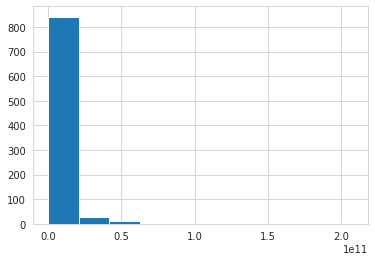

In [22]:
data['Charges for the use of intellectual property, payments (BoP, current US$)'].hist()

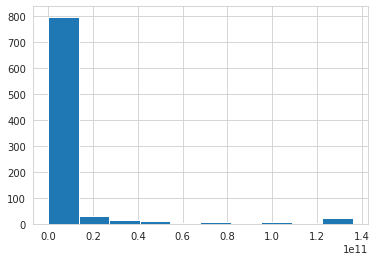

In [24]:
data['Charges for the use of intellectual property, receipts (BoP, current US$)'].hist()

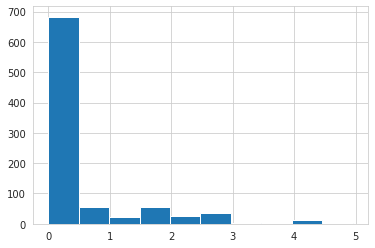

In [25]:
data['Research and development expenditure (% of GDP)'].hist()

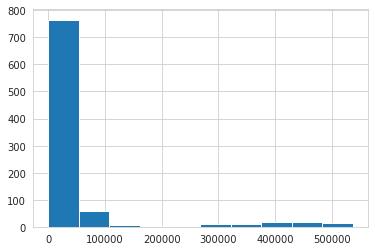

In [26]:
data['Scientific and technical journal articles'].hist()

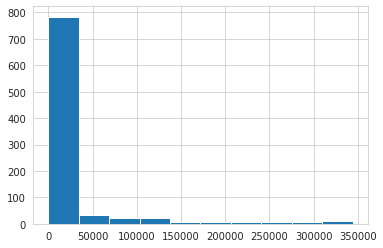

In [27]:
data['Patent applications, nonresidents'].hist()

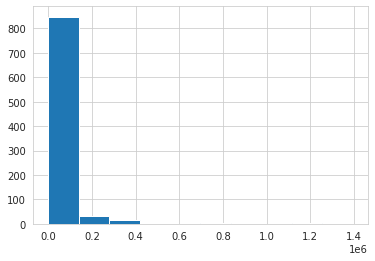

In [28]:
data['Patent applications, residents'].hist()

In [29]:
# data['Trademark applications, direct nonresident'].hist()

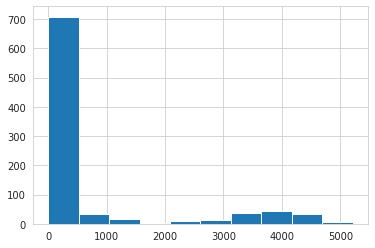

In [30]:
data['Researchers in R&D (per million people)'].hist()

In [31]:
# data['Technicians in R&D (per million people)'].hist()

In [32]:
# data['Trademark applications, direct resident'].hist()

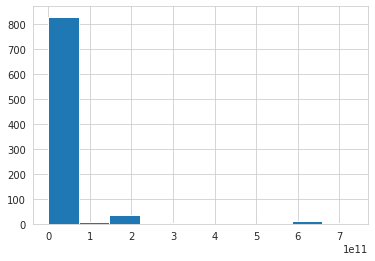

In [33]:
data['High-technology exports (current US$)'].hist()

In [34]:
# data['High-technology exports (% of manufactured exports)'].hist()

Text(0.5, 0, 'Year')

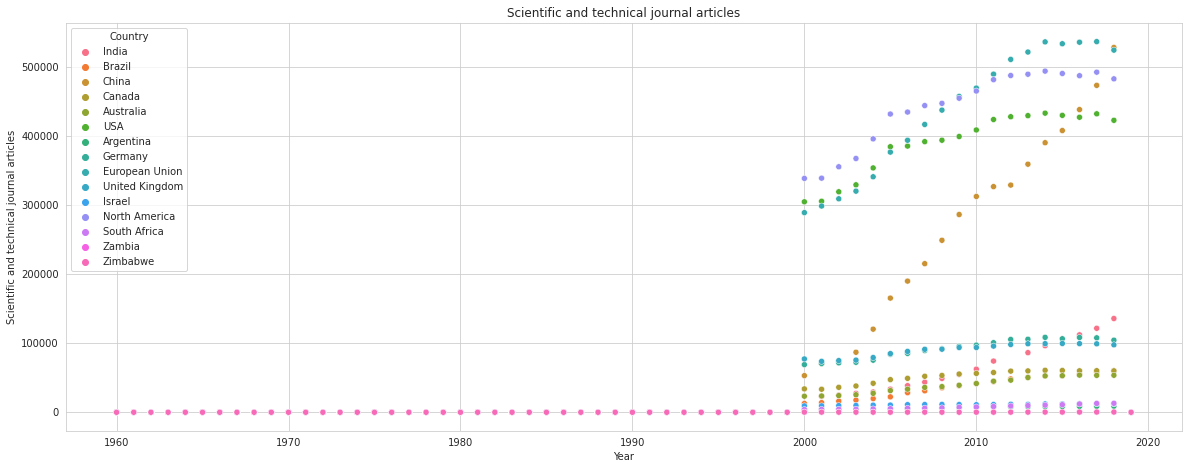

In [35]:
plt.figure(figsize=[20, 7.5]) # Set dimensions for figure
sns.scatterplot(x=data['Year'], y=data['Scientific and technical journal articles'], hue='Country', data=data)
plt.title('Scientific and technical journal articles')
plt.ylabel('Scientific and technical journal articles')
plt.xlabel('Year')

Text(0.5, 0, 'Year')

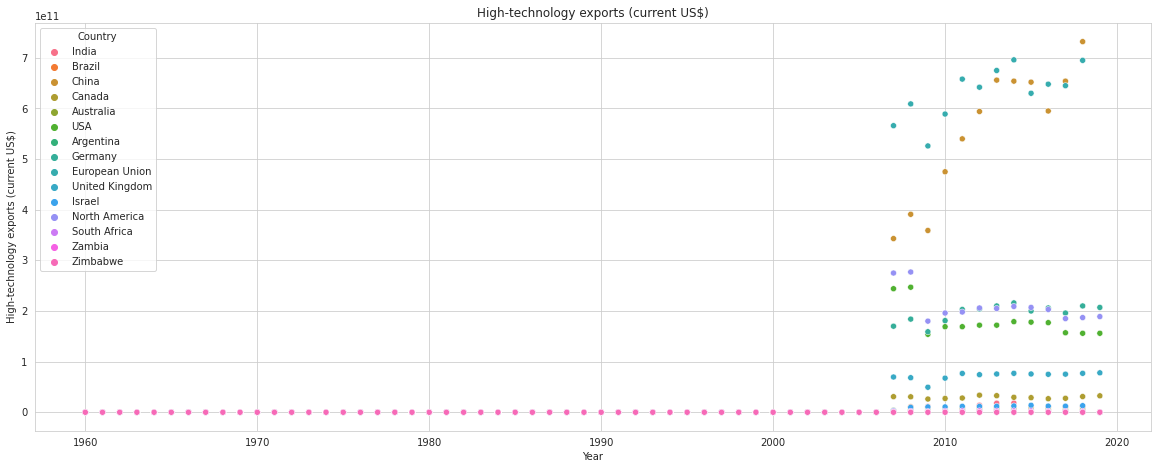

In [36]:
plt.figure(figsize=[20, 7.5]) # Set dimensions for figure
sns.scatterplot(x=data['Year'], y=data['High-technology exports (current US$)'], hue='Country', data=data)
plt.title('High-technology exports (current US$)')
plt.ylabel('High-technology exports (current US$)')
plt.xlabel('Year')

Text(0.5, 0, 'Year')

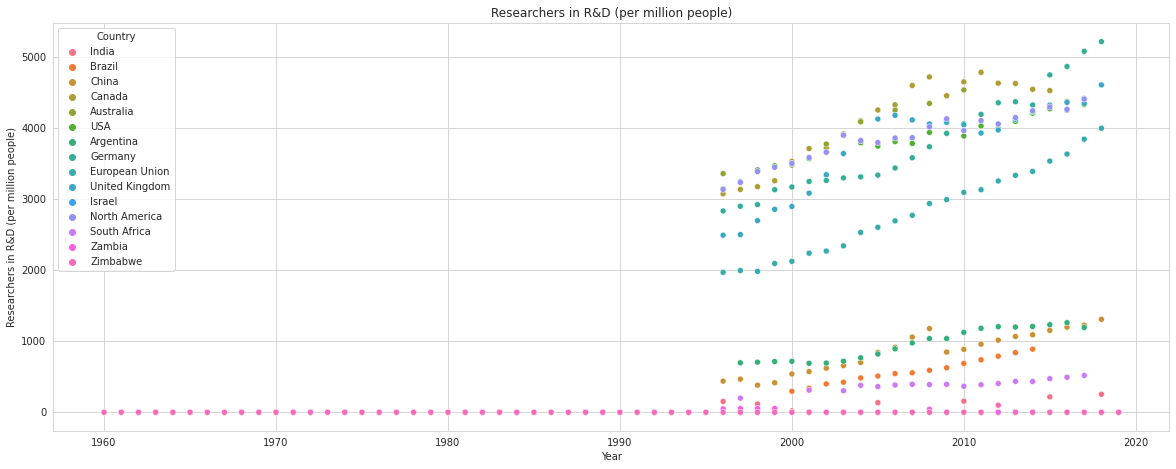

In [37]:
plt.figure(figsize=[20, 7.5]) # Set dimensions for figure
sns.scatterplot(x=data['Year'], y=data['Researchers in R&D (per million people)'], hue='Country', data=data)
plt.title('Researchers in R&D (per million people)')
plt.ylabel('Researchers in R&D (per million people)')
plt.xlabel('Year')

Text(0.5, 0, 'Year')

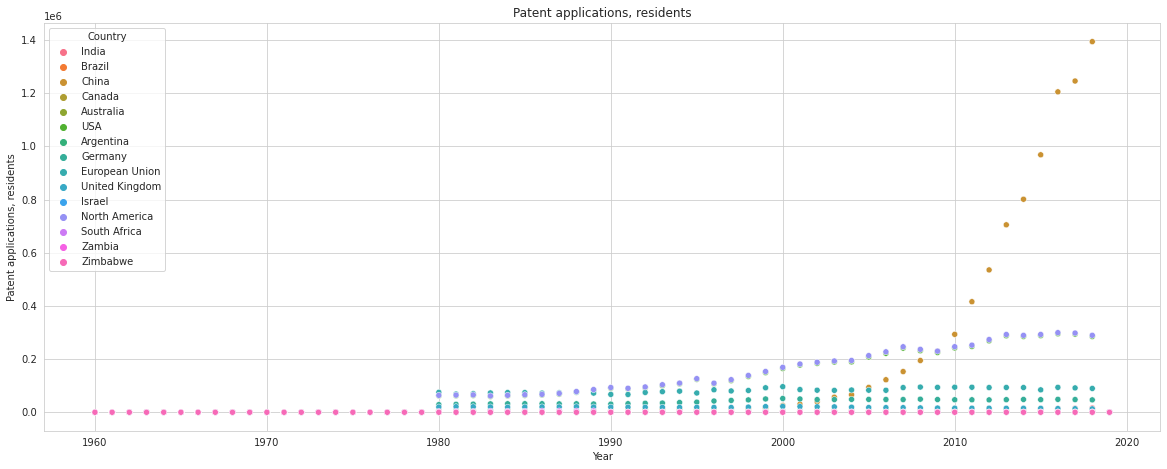

In [38]:
plt.figure(figsize=[20, 7.5]) # Set dimensions for figure
sns.scatterplot(x=data['Year'], y=data['Patent applications, residents'], hue='Country', data=data)
plt.title('Patent applications, residents')
plt.ylabel('Patent applications, residents')
plt.xlabel('Year')

Text(0.5, 0, 'Year')

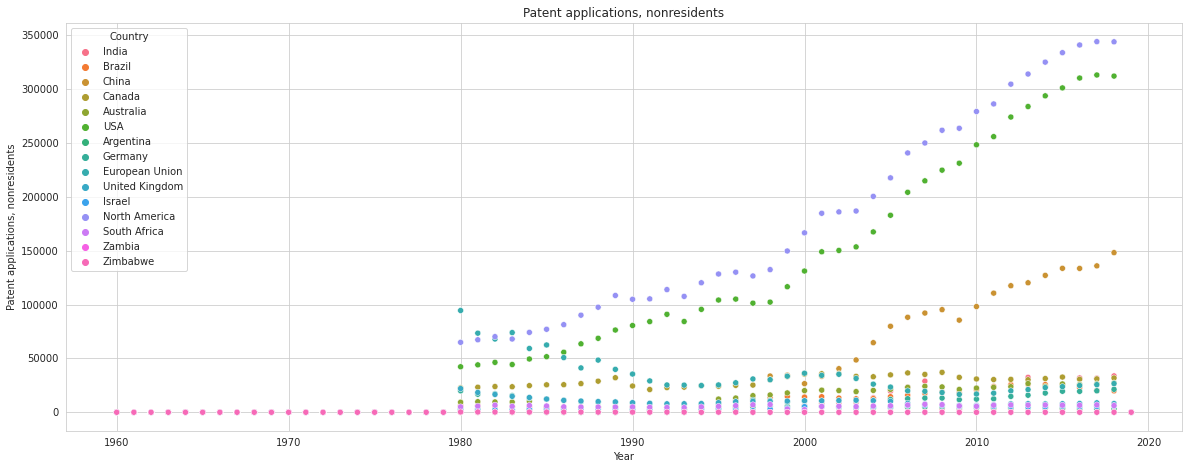

In [39]:
plt.figure(figsize=[20, 7.5]) # Set dimensions for figure
sns.scatterplot(x=data['Year'], y=data['Patent applications, nonresidents'], hue='Country', data=data)
plt.title('Patent applications, nonresidents')
plt.ylabel('Patent applications, nonresidents')
plt.xlabel('Year')

Text(0.5, 0, 'Year')

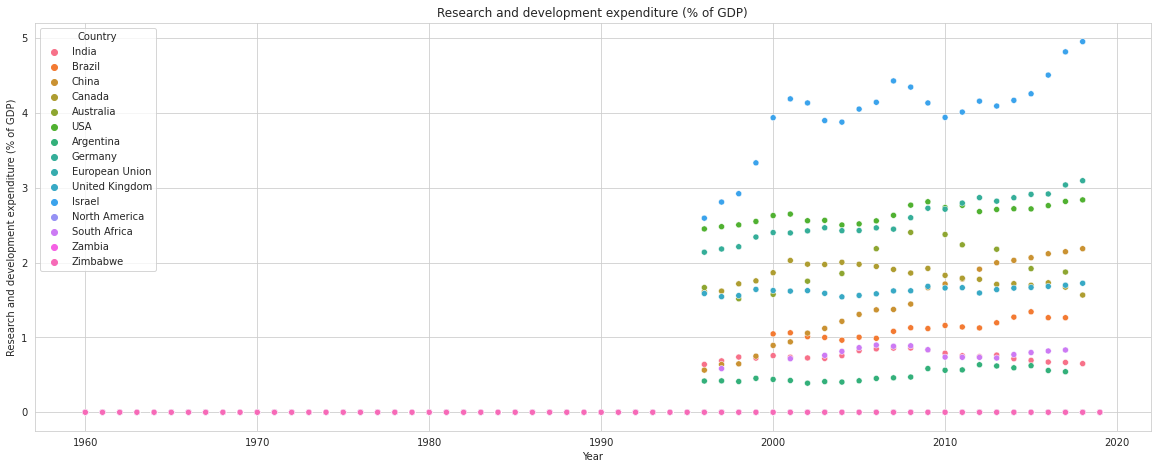

In [40]:
plt.figure(figsize=[20, 7.5]) # Set dimensions for figure
sns.scatterplot(x=data['Year'], y=data['Research and development expenditure (% of GDP)'], hue='Country', data=data)
plt.title('Research and development expenditure (% of GDP)')
plt.ylabel('Research and development expenditure (% of GDP)')
plt.xlabel('Year')

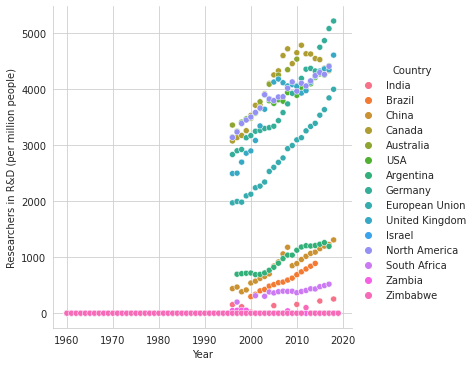

In [41]:
sns.set_style('whitegrid')
sns.relplot(x ='Year',
            y='Researchers in R&D (per million people)', hue='Country', data=data)

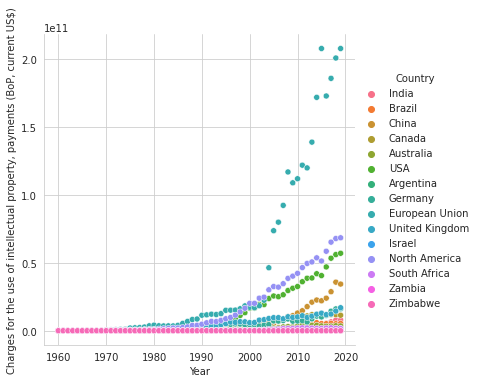

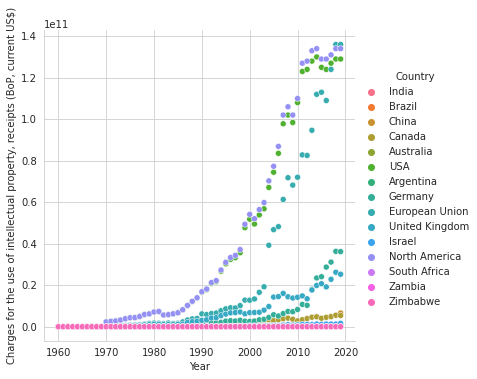

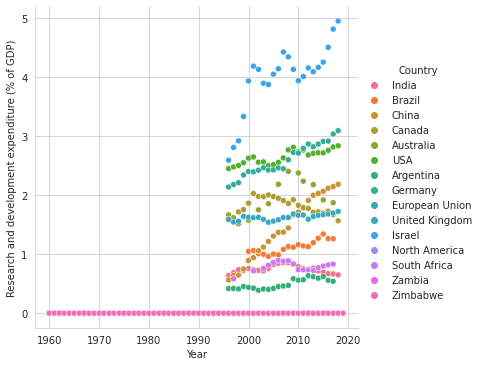

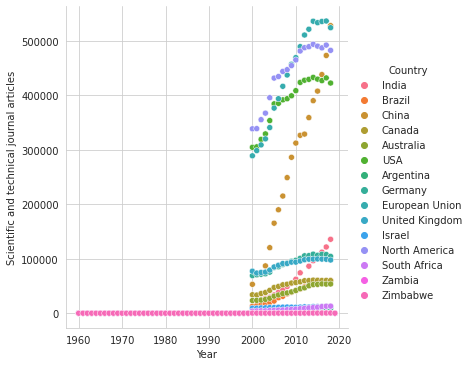

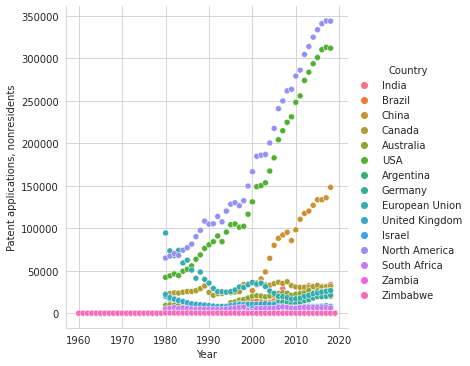

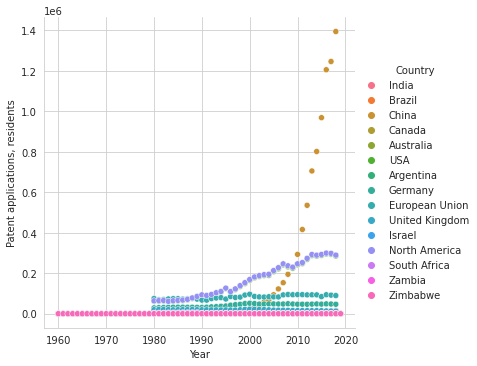

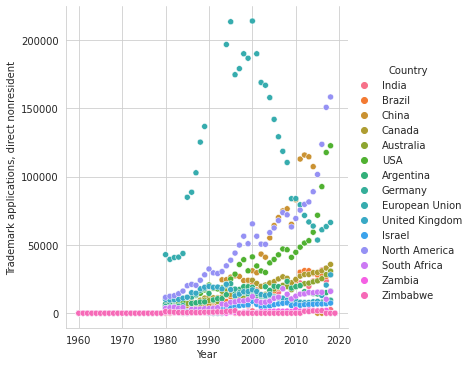

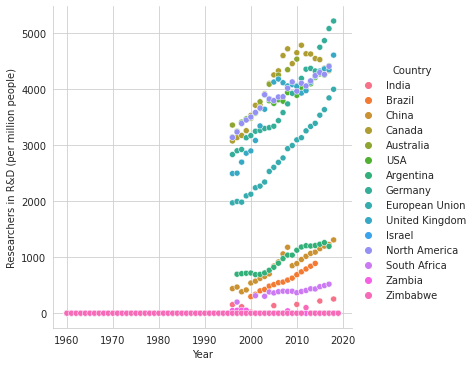

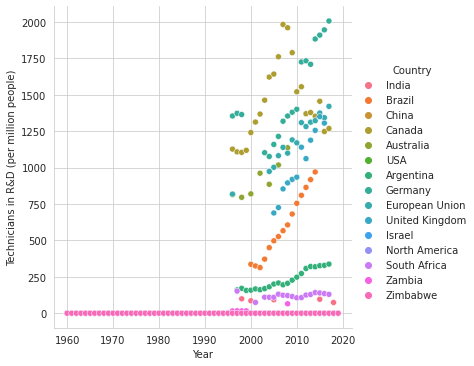

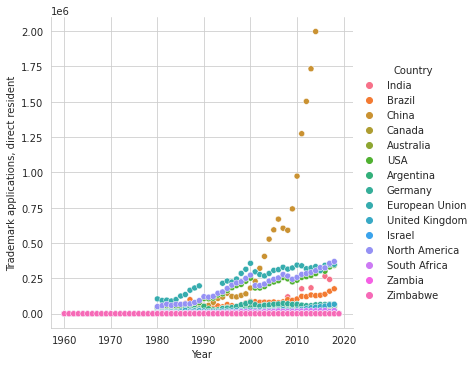

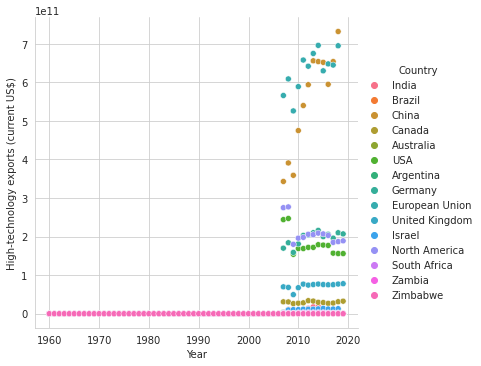

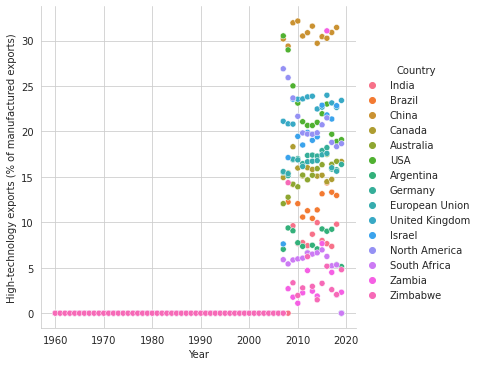

In [42]:
sns.set_style('whitegrid')
# groupedvalues=df.iloc[:,:].groupby('Year').sum().reset_index()

# fig.suptitle('INDIA (1960 to 2019)')

sns.relplot(x='Year',y='Charges for the use of intellectual property, payments (BoP, current US$)',data=data, hue='Country')
sns.relplot(x ='Year', y ='Charges for the use of intellectual property, receipts (BoP, current US$)',  data=data, hue='Country')
sns.relplot(x='Year',y='Research and development expenditure (% of GDP)',data=data, hue='Country')
sns.relplot(x='Year',y='Scientific and technical journal articles',data=data, hue='Country')
sns.relplot(x='Year',y='Patent applications, nonresidents',data=data, hue='Country')
sns.relplot(x ='Year', y ='Patent applications, residents',  data=data, hue='Country')
sns.relplot(x='Year',y='Trademark applications, direct nonresident',data=data, hue='Country')
sns.relplot(x='Year',y='Researchers in R&D (per million people)',data=data, hue='Country')

sns.relplot(x='Year',y='Technicians in R&D (per million people)',data=data, hue='Country')
sns.relplot(x ='Year', y ='Trademark applications, direct resident',  data=data, hue='Country')

sns.relplot(x='Year',y='High-technology exports (current US$)',data=data, hue='Country')
sns.relplot(x='Year',y='High-technology exports (% of manufactured exports)',data=data, hue='Country')